## Emotion Recognition using Facial Landmarks

This work builds on an emotion classifier using a specific dataset, based on landmarks from faces.

This dataset contains images of the face of an actress expressing four different emotional tates, beyond the neutral state: "joy", "anger", "fear", "sadness". The file "imagedb_CH_disciplina.csv" associates each image with an emotional label and also with the coordinates of characteristic points of the face.  

**For copyright purpose I am not including the dataset used in this notebook**, but you can obtain more information in the link below:  
http://www.dca.fee.unicamp.br/~paula/CH-Unicamp/termsconditions.html

### Libraries

Some libraries were used to help in this task. Below is a brief description of each one.


In [2]:
import pandas as pd #Pandas is a very useful tool for data analysis

import matplotlib.pyplot as plt #Matplot is a classic Python library for plotting charts
import matplotlib.image as mpimg
%matplotlib inline
import os #Miscellaneous operating system interfaces
import random #Generate pseudo-random numbers
from collections import Counter #High-performance container datatypes

#scikit-learn: Machine Learning in Python, Simple and efficient tools for data mining and data analysis
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Loading Dataset

The .CSV file was read through a Pandas method

Just below, we can see the columns and some samples of the dataset.

In [3]:
file = pd.read_csv("Faces/imagedb_CH_disciplina.csv", header=None)

In [4]:
file.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Em9_Fala3_0204_640x480.png,admiration,i,k,\at,k,o,\at,NaN,(303.5;319.0),...,(462.0;224.5),(467.0;250.5),(436.0;300.0),(428.5;289.5),(326.5;325.0),(326.5;334.5),(345.5;327.0),(344.0;338.0),(363.5;325.5),(363.5;333.0)
1,Em9_Fala1_0220_640x480.png,admiration,\ep,u\~^,\ct,t,\ic,\ct,NaN,(317.5;328.5),...,(457.5;218.5),(464.0;246.0),(439.0;295.0),(428.5;288.0),(332.5;324.0),(332.5;336.0),(344.5;321.5),(344.0;339.5),(354.0;323.5),(355.0;336.5)
2,Em9_Fala3_0147_640x480.png,admiration,i,k,\ep,\gf,NaN,\ep,NaN,(293.5;309.5),...,(454.5;221.0),(461.5;248.0),(433.5;296.5),(424.0;287.0),(314.0;312.5),(311.0;330.0),(333.0;314.5),(328.5;330.0),(351.5;315.0),(351.5;325.5)
3,Em9_Fala1_0142_640x480.png,admiration,m,i,\fh,a,d,\fh1,NaN,(298.0;297.5),...,(459.0;216.5),(467.0;244.5),(438.5;291.0),(428.5;280.5),(317.5;296.0),(316.5;315.5),(339.0;297.0),(339.0;319.5),(355.5;296.5),(357.0;319.5)
4,Em9_Fala2_0079_640x480.png,admiration,\zh,u,\fh,\hs,k,\fh2,NaN,(317.0;315.5),...,(463.0;221.0),(471.5;248.5),(440.5;297.0),(432.0;283.5),(336.5;315.0),(336.5;317.0),(348.0;315.0),(348.0;320.0),(359.0;315.0),(359.0;316.5)


The columns are not labeled, so we can assign headers to them.  
The first one is a column which contains the file names and the second column associates an emotional label with each image.  
We will not use the columns "feat_2" until "feat_8".  
All other columns are the coordinates of characteristic points of the face.

In [5]:
file = file.add_prefix("feat_")
file.rename(index=str,columns={"feat_0":"Image","feat_1":"Emotion"},inplace=True)
file = file.drop(file.loc[:,'feat_2':'feat_8'],axis=1)
file.head()

,Image,Emotion,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,Em9_Fala3_0204_640x480.png,admiration,(303.5;319.0),(378.5;326.0),(343.5;319.5),(342.0;347.5),(334.0;315.5),(354.0;314.5),(318.5;316.5),(367.5;318.5),...,(462.0;224.5),(467.0;250.5),(436.0;300.0),(428.5;289.5),(326.5;325.0),(326.5;334.5),(345.5;327.0),(344.0;338.0),(363.5;325.5),(363.5;333.0)
1,Em9_Fala1_0220_640x480.png,admiration,(317.5;328.5),(367.5;328.0),(345.0;313.0),(343.5;352.0),(335.5;312.0),(353.5;312.0),(325.5;317.5),(362.0;317.5),...,(457.5;218.5),(464.0;246.0),(439.0;295.0),(428.5;288.0),(332.5;324.0),(332.5;336.0),(344.5;321.5),(344.0;339.5),(354.0;323.5),(355.0;336.5)
2,Em9_Fala3_0147_640x480.png,admiration,(293.5;309.5),(376.0;314.5),(334.5;307.0),(325.5;338.5),(324.0;304.0),(345.5;305.5),(306.5;305.0),(361.0;307.5),...,(454.5;221.0),(461.5;248.0),(433.5;296.5),(424.0;287.0),(314.0;312.5),(311.0;330.0),(333.0;314.5),(328.5;330.0),(351.5;315.0),(351.5;325.5)
3,Em9_Fala1_0142_640x480.png,admiration,(298.0;297.5),(378.0;302.0),(339.5;289.5),(337.5;327.5),(329.5;286.0),(349.0;285.5),(313.5;289.5),(364.0;291.0),...,(459.0;216.5),(467.0;244.5),(438.5;291.0),(428.5;280.5),(317.5;296.0),(316.5;315.5),(339.0;297.0),(339.0;319.5),(355.5;296.5),(357.0;319.5)
4,Em9_Fala2_0079_640x480.png,admiration,(317.0;315.5),(375.0;317.0),(349.5;304.5),(347.0;334.0),(340.5;302.5),(357.5;302.0),(330.5;307.0),(368.5;307.5),...,(463.0;221.0),(471.5;248.5),(440.5;297.0),(432.0;283.5),(336.5;315.0),(336.5;317.0),(348.0;315.0),(348.0;320.0),(359.0;315.0),(359.0;316.5)


Lets visualize the distribution of "Emotions".

It is good practice to know how the categories are distributed, that is, to check how many samples we have of each category in the data set.

As we can see all classes are balanced with 39 samples each one.

In [6]:
print(file.Emotion.value_counts())
print ("\nWe have", len(file.Emotion.unique()), "categories of emotions")

love              39
hope              39
fearsconfirmed    39
remorse           39
gloating          39
disgust           39
admiration        39
ressentment       39
satisfaction      39
relief            39
gratitude         39
disapointment     39
anger             39
reproach          39
joy               39
pity              39
neutral           39
sadness           39
shame             39
fear              39
pride             39
gratification     39
happyfor          39
Name: Emotion, dtype: int64

We have 23 categories of emotions


We can also "to see" how the categories are distributed through the histogram:

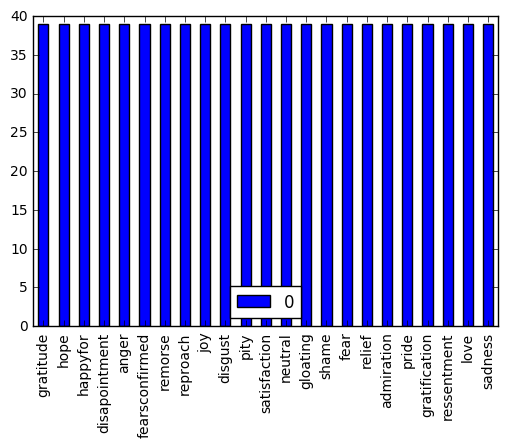

In [7]:
pd.DataFrame.from_dict(Counter(file.Emotion),orient='index').plot(kind='bar')

The full dataset contains 23 categories of emotions. Let's select only some ones: "neutral", "joy", "anger", "fear" and "sadness"

In [8]:
dataset = file[file["Emotion"].isin(["neutral", "joy", "anger", "fear","sadness"])]

In [9]:
dataset.Emotion.unique()

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype=object)

In [10]:
dataset.head()

,Image,Emotion,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
39,Em22_Fala1_0049_640x480.png,anger,(302.0;328.0),(370.5;331.5),(340.0;315.5),(337.5;368.0),(330.0;312.0),(350.0;312.5),(314.5;317.5),(362.5;319.0),...,(453.5;227.0),(459.0;254.5),(428.5;302.5),(422.0;296.0),(318.0;323.5),(316.5;356.0),(338.5;322.5),(337.5;358.0),(359.5;323.0),(357.5;351.0)
40,Em22_Fala3_0041_640x480.png,anger,(333.5;340.5),(386.5;337.0),(365.0;312.0),(361.0;372.5),(354.5;312.0),(377.0;310.5),(341.0;323.5),(385.0;322.5),...,(451.5;215.5),(457.5;238.0),(436.5;292.5),(429.0;290.0),(345.5;328.5),(345.0;350.0),(362.5;322.0),(361.5;356.5),(375.0;323.0),(376.0;343.0)
41,Em22_Fala1_0165_640x480.png,anger,(297.5;308.0),(373.0;311.5),(339.0;295.0),(336.5;340.5),(327.5;292.0),(349.0;293.0),(310.5;297.0),(363.5;300.0),...,(453.0;224.5),(460.0;253.0),(429.0;299.0),(420.5;289.5),(319.0;300.0),(316.0;327.5),(337.0;300.5),(336.5;332.0),(357.0;303.0),(357.5;328.5)
42,Em22_Fala2_0166_640x480.png,anger,(309.0;322.0),(383.5;325.0),(355.5;307.0),(352.0;355.0),(345.0;303.0),(365.5;304.0),(326.0;309.5),(378.0;313.0),...,(445.5;222.0),(451.5;250.0),(429.0;298.5),(422.5;295.0),(334.0;316.0),(331.0;344.5),(353.5;315.5),(351.5;346.0),(371.5;318.0),(370.5;339.5)
43,Em22_Fala3_0292_640x480.png,anger,(317.0;331.5),(381.0;333.0),(352.5;319.0),(350.0;358.5),(341.5;316.0),(362.0;316.0),(329.0;321.5),(371.0;322.0),...,(455.5;226.0),(461.0;251.0),(434.5;300.0),(427.0;295.0),(332.0;328.0),(331.0;342.5),(350.5;327.0),(350.5;346.0),(369.5;329.0),(369.5;338.5)


Now we have 195 samples divided in 5 categories with 56 features each one (columns from feat_9 until feat_64)

In [11]:
dataset.shape

(195, 58)

We need to do a clean up in the coordinates values. For example, removing the "parentheses" and splitting the coordinates in X and Y

In [12]:
dataset=dataset.apply(lambda x: x.str.replace(r"[\\(\\)]",""))

for i in range(9,65):
    dataset['feat_{}_x'.format(i)] = dataset.loc[:,'feat_{}'.format(i)].apply(lambda x: x.split(";")[0])    
    dataset['feat_{}_y'.format(i)] = dataset.loc[:,'feat_{}'.format(i)].apply(lambda x: x.split(";")[1])
    dataset = dataset.drop('feat_{}'.format(i),axis=1)
dataset.head()

,Image,Emotion,feat_9_x,feat_9_y,feat_10_x,feat_10_y,feat_11_x,feat_11_y,feat_12_x,feat_12_y,...,feat_60_x,feat_60_y,feat_61_x,feat_61_y,feat_62_x,feat_62_y,feat_63_x,feat_63_y,feat_64_x,feat_64_y
39,Em22_Fala1_0049_640x480.png,anger,302.0,328.0,370.5,331.5,340.0,315.5,337.5,368.0,...,316.5,356.0,338.5,322.5,337.5,358.0,359.5,323.0,357.5,351.0
40,Em22_Fala3_0041_640x480.png,anger,333.5,340.5,386.5,337.0,365.0,312.0,361.0,372.5,...,345.0,350.0,362.5,322.0,361.5,356.5,375.0,323.0,376.0,343.0
41,Em22_Fala1_0165_640x480.png,anger,297.5,308.0,373.0,311.5,339.0,295.0,336.5,340.5,...,316.0,327.5,337.0,300.5,336.5,332.0,357.0,303.0,357.5,328.5
42,Em22_Fala2_0166_640x480.png,anger,309.0,322.0,383.5,325.0,355.5,307.0,352.0,355.0,...,331.0,344.5,353.5,315.5,351.5,346.0,371.5,318.0,370.5,339.5
43,Em22_Fala3_0292_640x480.png,anger,317.0,331.5,381.0,333.0,352.5,319.0,350.0,358.5,...,331.0,342.5,350.5,327.0,350.5,346.0,369.5,329.0,369.5,338.5


So, we have 195 samples divided in 5 categories with 112 features each one (columns from feat_9_x until feat_64_y)

In [13]:
dataset.shape

(195, 114)

Let's see some examples from the database.

**Terms and Conditions of Use**:  
http://www.dca.fee.unicamp.br/~paula/CH-Unicamp/termsconditions.html

In [14]:
def plot_image(x,y,axis,image):
    img = mpimg.imread("Faces\\"+image)
    axis.imshow(img)
    axis.scatter(x,y,s=15,c='r')

In [15]:
files = os.listdir("Faces\\")

images = dataset.Image.tolist()
#set(files) - set(images)

In [16]:
match =  (set(files) & set(images) )

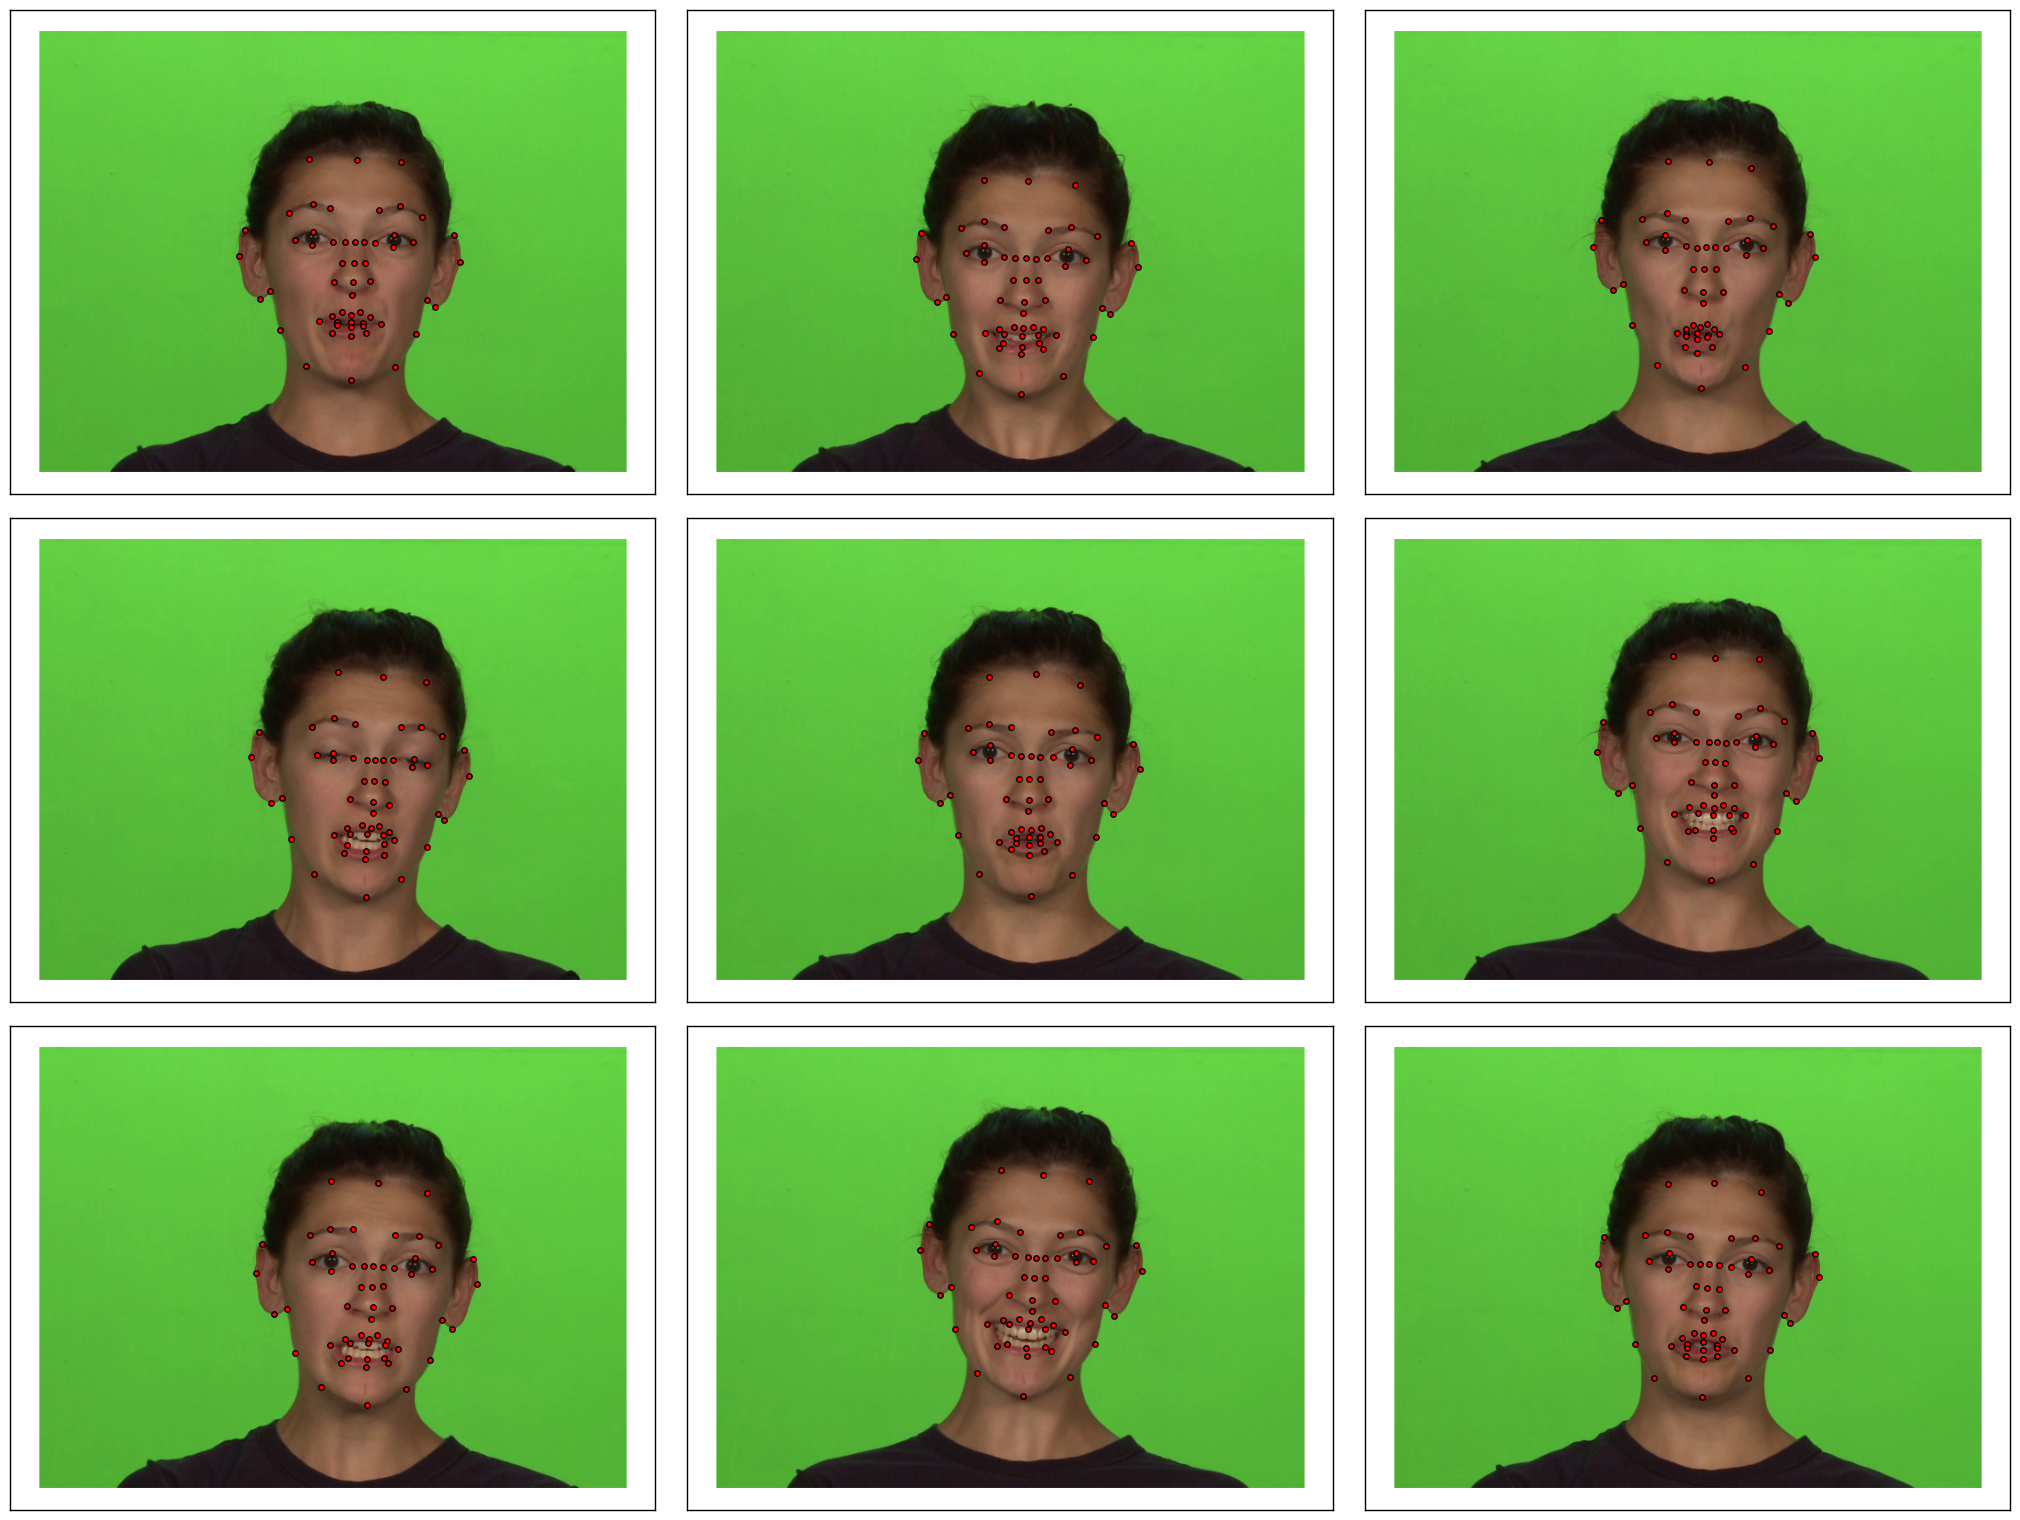

In [17]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    image_name = random.choice(os.listdir("Faces\\"))
    while (image_name not in list(match)):
        image_name = random.choice(os.listdir("Faces\\"))
    new = dataset[dataset["Image"]==image_name]
    X = new.loc[:,'feat_9_x'::2]
    Y = new.loc[:,'feat_9_y'::2]
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plot_image(X,Y,ax,image_name)

## Train and Test

We will train some classical classifiers and compare the accuracy of them.  

* [SVM - C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
    * Kernel Linear
    * Kernel RBF
    * Kernel Polynomial
* [K-Nearest Neighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
* [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
* [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [18]:
C=1
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=0.5, C=C),
          SVC(kernel='poly', degree=3, C=C),
          KNeighborsClassifier(3),
          DecisionTreeClassifier(max_depth=8),
          RandomForestClassifier(max_depth=8, n_estimators=10, max_features=1),          
          AdaBoostClassifier(),
          GaussianNB(),
         )

names = ["SVC with linear kernel","SVC with RBF kernel","SVC with polynomial (degree 3) kernel",
         "K Nearest Neighbors","Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"]

The first step is to separate the dataset into two sets: features and labels

In [19]:
features = dataset.loc[:,'feat_9_x':]
labels = dataset.Emotion

print (features.shape,labels.shape)

(195, 112) (195,)


## k-holdout or k-fold cross validation?

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**.

The usual approach is to split the complete dataset into a training set and a classification set. We use the training set to teach the classifier to recognize the to-be-predicted labels, and use the classification set to estimate the classifier performance.

There are many techniques to avoid the overfitting, I will introduce two that act directly on the data: [**k-holdout and k-fold cross validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

**k-fold cross-validation**. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data.

**Holdout method**. This can be considered the simplest variation of k-fold cross-validation, although it does not cross-validate. We randomly assign data points to two sets d0 and d1, usually called the training set and the test set, respectively. The size of each of the sets is arbitrary although typically the test set is smaller than the training set. We then train on d0 and test on d1.

### k-holdout

We randomly divide 80% of the data into a training set and 20% into a test set, then feed these into the classifier and train it on the training set. Finally we evaluate the resulting model by predicting what is in the test set to see how the model handles the unknown data.

In [20]:
train_feat,test_feat,train_labels,test_labels = train_test_split(features,labels, test_size=0.20,random_state=42 )

print ("Training set:", train_feat.shape[0], "samples")
print ("Test set:", test_feat.shape[0], "samples")

Training set: 156 samples
Test set: 39 samples


In [21]:
#models = (clf.fit(train_feat,train_labels) for clf in models)

In [22]:
print ("      Classifiers: \t Accuracy:".expandtabs(44))
for name, clf in zip(names, models):     
    clf.fit(train_feat,train_labels) #train each model
    scores = clf.score(test_feat,test_labels) #evaluate each model in the test set
    print ("{:46} {:.3f} ".format(name, scores.mean()))

      Classifiers:                           Accuracy:
SVC with linear kernel                         0.923 
SVC with RBF kernel                            0.308 
SVC with polynomial (degree 3) kernel          0.923 
K Nearest Neighbors                            0.897 
Decision Tree                                  0.897 
Random Forest                                  0.718 
AdaBoost                                       0.718 
Naive Bayes                                    0.692 


### k-fold cross validation

A model is trained using k-1 of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

We will use K=10

In [27]:
print ("      Classifiers: \t Accuracy (standard deviation)".expandtabs(37))
for name, clf in zip(names, models):    
    scores = cross_val_score(clf,features,labels,cv=10) #train and evaluate each model in each fold    
    print ("{:41} {:.3f} (+/- {:.3f}) ".format(name, scores.mean(), scores.std() * 2))    

      Classifiers:                    Accuracy (standard deviation)
SVC with linear kernel                    0.920 (+/- 0.150) 
SVC with RBF kernel                       0.613 (+/- 0.174) 
SVC with polynomial (degree 3) kernel     0.920 (+/- 0.150) 
K Nearest Neighbors                       0.823 (+/- 0.164) 
Decision Tree                             0.800 (+/- 0.224) 
Random Forest                             0.728 (+/- 0.172) 
AdaBoost                                  0.705 (+/- 0.251) 
Naive Bayes                               0.712 (+/- 0.209) 


## Results

Let's organize the results above in the next table:

| Classifier | k-holdout Acc | k-fold Acc         
| :-: |:-------------: | :-:
|SVC with linear kernel               	 | 0.923	 | 0.920 (+/- 0.150)	
|SVC with RBF kernel                  	 | 0.308	 | 0.613 (+/- 0.174)	
|SVC with polynomial (degree 3) kernel	 | 0.923	 | 0.920 (+/- 0.150)	
|K Nearest Neighbors                  	 | 0.897	 | 0.823 (+/- 0.164)	
|Decision Tree                        	 | 0.897	 | 0.800 (+/- 0.224)	
|Random Forest                        	 | 0.718	 | 0.728 (+/- 0.172)	
|AdaBoost                             	 | 0.718	 | 0.705 (+/- 0.251)	
|Naive Bayes                          	 | 0.692	 | 0.712 (+/- 0.209)	

Theoretically, k-fold cross validation presents better accuracy and we can prove this in almost all algorithms. In our case, there is no great divergence between k-holdout and k-fold because of the small number of samples and because we use a good split of the set in training and testing.

In addition, my best results (92.30%) were achieved with SVM classifiers (or C-Support Vector Classification), both with the linear kernel and with the polynomial of degree 3.  

I consider that I achieved a good result without using more sophisticated techniques of machine learning like [pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html), [hyper-parameters tunning](http://scikit-learn.org/stable/modules/grid_search.html), or even CNNs - convolutional neural networks (deep learning).

The approach of using the landmarks instead of the images themselves makes the machine learning process simpler and requires less processing. Another factor that simplified this task was the fact that the database provided the landmarks and did not need to preprocess all the images to obtain them.


Finally, I just would like to show an example of a prediction from a classifier.

**Just as an example**, I got the last 8 samples predicted by the SVC linear:
* First line: original labels from the test set
* Second Line: Predicted labels
* Third Line: The maximal probability reached by the label

In this example, we can see that the latest two images were misclassified.

In [24]:
mod = SVC(kernel='linear', C=C,probability=True)
mod.fit(train_feat,train_labels)

print('Labels Test Set:',test_labels[-8:].reshape(1,8))

y_hat = mod.predict(test_feat[-8:])
print('Predicted labels:  ',y_hat[-8:])

y_prob = mod.predict_proba(test_feat[-8:])
print('Max Probabilities:\n',y_prob.max(axis=1))

Labels Test Set: [['fear' 'anger' 'sadness' 'neutral' 'sadness' 'anger' 'sadness' 'fear']]
Predicted labels:   ['fear' 'anger' 'sadness' 'neutral' 'sadness' 'anger' 'fear' 'sadness']
Max Probabilities:
 [ 0.98247708  0.82621387  0.8519192   0.48783976  0.64444173  0.63286875
  0.51045121  0.548685  ]
